<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Привет! Спасибо, что прислал задание:) Поздравляю с приближением к концу первого модуля. Мои комментарии обозначены пометкой **Комментарий наставника**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно; <font color=orange>оранжевый</font> - есть замечания, но не критично; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

## Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

In [1]:
import pandas as pd #импортирую библиотеку pandas для работы работы с датасетами
import matplotlib.pyplot as plt #импортирую библиотеку matplotlib для дальнейшей работы с  графиками
import seaborn as sns #импортирую библиотеку seaborn для работы с графиками
import numpy as np #импортирую библиотеку numpy для работы с математическими функциями
from scipy import stats as st #импортирую метод stats для работы со статистическими вычислениями
from math import factorial #импортирую метод factorial для вычисления факториала

In [2]:
games = pd.read_csv('/datasets/games.csv') #датасет прочитан и заключен в переменную games

In [3]:
games.info() #первичное представление о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(10) #первые 10 строчек датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
#определим наличие и количество пропущенных значений
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
#каждый столбец таблицы проверим на наличие и количество уникальных значений
games['Name'].value_counts() #есть пропущенные значения (2)
games['Platform'].value_counts() #все в порядке
games['Year_of_Release'] #тип данных необходимо привести к целочисленнему; есть пропущенные значения (269)
games['Genre'].value_counts() #есть пропущенные значения (2)
games['NA_sales'].value_counts() #много нулевых значений и выбивающиеся показатели
games['EU_sales'].value_counts() #много нулевых значений и выбивающиеся показатели
games['JP_sales'].value_counts() #много нулевых значений и выбивающиеся показатели
games['Other_sales'].value_counts() #много нулевых значений и выбивающиеся показатели
games['Critic_Score'].value_counts() #тип данных необходимо привести к целочисленному; есть пропущенные значения (8578)
games['User_Score'].value_counts() #значение tbd; есть пропущенные значения (6701)
games['Rating'].value_counts() #есть пропущенные значения (6766)

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [7]:
#проверим таблицу на наличие и количество дубликатов
games.duplicated().sum()
#дубликатов не обнаружено

0

### Вывод

##### До начала работы с таблицы было сделано:
1. Импортированы библиотеки pandas, seaborn, matplotlib и numpy для работы с датасетами, графиками и математическими функциями;
2. Импортированы методы stats и factorial для работы со статистическими вычислениями и факториалом.

##### Предварительная работа с таблицей:
1. Для датасета была создана переменная games;
2. Получено сводная информация о датасете (наименование и количество столбцов, элементов и тип данных) методом df.info и были выведены первые 10 строчек методом df.head();
3. Для каждого столбца методом .value_counts() было определено наличие и количество уникальных значений.

##### Информация о датасете games

##### Количество элементов: 16715; количество столбцов: 11; типы данных: float и object.

##### Наименование столбцов датасета, их содержимое и проблемы, обнаруженные при первичном анализе:

'Name' - название игры - пропущенные значения (2);
'Platform' - платформа - все в порядке;
'Year_of_Release' - год выпуска - тип данных необходимо привести к целочисленному - пропущенные значения (269);
'Genre' - жанр игры - пропущенные значения (2);
'NA_sales' - продажи в Северной Америке - много нулевых значений и выбивающиеся показатели;
'EU_sales' - продажи в Европе - много нулевых значений и выбивающиеся показатели;
'JP_sales' - продажи в Японии - много нулевых значений и выбивающиеся показатели;
'Other_sales' - продажи в других странах - много нулевых значений и выбивающиеся показатели;
'Critic_Score' - оценка критиков - тип данных необходимо привести к целочисленному - пропущенные значения (8678);
'User_Score' - оценка пользователей - тип данных необходимо привести к целочисленному - значения tbd;
'Rating' - рейтинг от организации ESRB - пропущенные значения (6766).

##### Предположения о появлении пропусков и уникальных значений, и предложения по их заполнению и обработке:
1. Пропуски в столбцах 'Name' и 'Genre' между собой связаны. Их суммарно четыре штуки и возникнуть они могли элементарно из-за того, что данные просто не было введены в таблицу. Их можно удалить, т.к их доля в общем массиве данных несущественна и не повлияет на дальнейшие результаты;
2. Пропуски в столбце 'Year_of_Release' могут быть связаны с отсутствием данных о выпуске игры на определенной платформе. Можно будет заполнить пропуски в соответствии с датой выхода игры на другой платформе, а остальные, если не получится все, удалить;
3. Пропуски в столбцах 'NA_sales', 'EU_sales', 'JP_sales' и 'Other_sales' могут быть связаны с отсутвстием о продажах конкретных игр в конкретных регионах. Конечно, можно было бы заполнить их все медианным или средним арифметическим значением, но тогда это существенно подпортит нам финальные результаты, что недопустимо. Удалять их тоже некорректно, потому что потеряется большой объем данных. Думаю, можно заменить эти нулевые значения специальным маркером, а потом, когда будут производиться операции с этими столбцами, использовать метод .query;
4. Пропуски в столбцах 'Critic_Score', 'Users_Score' и 'Rating' могут быть связаны с тем, что оценки критиков, пользователей и возврастной рейтинг не были загружены на агрегатор оценок. Можно попробовать заменить их нулевым значением или специальным маркером. Также в этих столбцах есть значение 'tbd', о котором ниже более подробно. Значение 'tbd' и отсутствующие оценки можно заменить специальным маркером по аналогии с пропусками в предыдущих столбцах.

###### Значение 'tbd'. Что это такое и причем тут Metacritic?

Оценки игр в таблице были, скорее всего, взяты с сайта-агрегатора. Самым популярным таким сайтом является Metacritic, собирающий информацию не только об играх, но также фильмах, сериал, мультфильмах и музыкальных альбомах. На нем предусмотрены идентичные варианты оценки продукта, прям как у нас в проекте - Critic Reviews по шкале от 0 до 100 и User Score по шкале от 0 до 10. Оценка продукта начинается формироваться, когда есть хотя бы четыре четыре рецензии или оценки от критиков, или пользователей. И тут появляется наше значение 'tbd'. Если отзывов менее четырех, то оценке присваивается статус 'tbd', что означает 'to be determined'. Сам портал Metacritic объясняет это тем, что при наличии четырех отзывыв точно итоговой оценки продукта становится более объективной. 
Кажется, годы мониторинга Metacritic, Rotten Tomatoes и Pitchfork не прошли даром.

###### Было проверено наличие и количество дубликатов в таблице. Результат отрицательный.

###### На этапе предобработки необходимо:
1. Исправить пропущенные значения;
2. Тип данных в столбцах 'Year_of_Release', 'Critic_Score' и 'User_Score' привести к целочисленному типу.
3. Названия столбцов в таблице привести к нижнему регистру;
4. Посчитать суммарные продажи во всех регионах и занести их в отдельный столбец.

###### На этапе исследовательского анализа необходимо:
1. Посмотреть, сколько игр выпускалось в конкретные годы и определить степень важности этих данных;
2. Выбрать платформы с наибольшими суммарными показателями продаж и построить распределения;
3. Определить актуальный период;
4. Определить наиболее прибыльные платформы;
5. Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам, и описать полученные результаты;
6. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
7. Соотнести выводы с продажами на других платформах.
8. Проанализировать общее распределение игр по жанрам. Что можно сказать об этом?

###### На этапе составления портрета пользователя каждого региона необходимо:
1. Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Описать разницу.
- Выявить, влияет ли рейтинг ESRB на продажи в отдельном регионе?

###### На этапе проверки гипотез необходимо:
1. Проверить гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и сформулировать альтернаивную;
2. Проверить гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные" и сформулировать альтернативную;
3. Объяснить, как были сформулированы нулевая и альтернативная гипотезы, и с помощью каких критериев они были проверены.

###### В заключении работы написать общий вывод

<div class="alert alert-success">
<h2> Комментарий наставника</h2> 

Первый взгляд на таблицу выполнен. Радует подробное описание имеющихся в данных проблем.

</div>

### Шаг 2. Предобработка данных

### Изменение типов данных

In [8]:
#до начала работы приведем все названия столбцов к нижнему регистру
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

##### Все названия столбцов приведены к нижнему регистру

### Обработка пропущенных значений


In [9]:
#удалим пропуски в столбцах 'name' и 'genre'
games.dropna(subset = ['name', 'genre'], inplace = True)

#напишем функцию, которая будет заменить пропущенные значения в столбце 'year_of_release' в соответствии с названием из столбца 'name'
def year_of_release(row):
    for i in range(1980, 2016):
        if (str(i) in row[0]) and (np.isnan(row[1])):
            return i
    return row[1]
games['year_of_release'] = games[['name', 'year_of_release']].apply(year_of_release, axis = 1)

#после выполнения, функция смогла заменить лишь 17 пропущенных значений, похоже, остальные 252 придется удалить
games.dropna(subset = ['year_of_release'], inplace = True)

#пропуски и значения 'tbd' в столбцах 'critic_score', 'user_score' и 'rating' заменим специальным маркером

#пропуски
games[['critic_score', 'user_score', 'rating']] = games[['critic_score', 'user_score', 'rating']].fillna(-11)

#значения 'tbd'
games[['critic_score', 'user_score', 'rating']] = games[['critic_score', 'user_score', 'rating']].replace('tbd', -11)

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Верно, по своей сути tbd и является Nan. 

</div>

#### Что было сделано:
1. Удалены пропуски в столбцах 'name' и 'genre'. Их всего четыре штуки и попытаться подобрать им адекватную замену заняло бы гораздо больше времени, что просто удалить их;
2. Написана функция, которая заменяет, если это возможно, пропущенные значения в столбце 'year_of_release' в соответствии с данными столбца 'name'. После применения функции было заменено 17 значений из 269, после чего было принято решение удалить оставшиеся 252 значения. Их удалением некритично.
3. Пропуски и значения 'tbd' в столбцах 'critic_score', 'user_score', 'rating' были заменены специальным маркером типа -11. Удалять их было бы слишком жестоко, а маркер можно отсесять про подсчете данных с помощью среза. Заменять значения средним или мединой здесь было бы некорректно.

##### Все пропущенные значения были исправлены

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Верно, лучше работать с меньшим количеством данных хорошего качества. Пропуски обработаны маркерными значениями. Так мы просто пометили места пропусков. Главное помнить об этом и не использовать их в анализе.
    
Ошибки в данных устранены. Пропуски обработаны там, где возможно. Данные подготовлены к дальнейшему анализу. 

</div>

### Изменение типов данных 2.0

In [10]:
#данные в столбцах 'year_of_release' и 'critic_score' приведем к целочисленным значениям
games[['year_of_release', 'critic_score']] = games[['year_of_release', 'critic_score']].astype('int')

#данные в столбце 'user_score' приведем сначала к десятичному значению, умножим на 10, приведем к целочисленному типу, и появившееся значение -110 заменим на -11
games['user_score'] = (games['user_score'].astype('float') *10).astype('int').replace(-110, -11)

games.head(10) #проверим изменения

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-11,-11,-11
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-11,-11,-11
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-11,-11,-11
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,66,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,84,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-11,-11,-11


##### Данные в столбцах 'years_of_release' и 'critic_score' были приведены к целочисленным показателям.
1. Замена в 'years_of_release' обусловлена тем, что не существует десятичных значений годов;
2. Замена в 'critic_score' обусловена тем, что у оценки критиков расположены на диапазоне от 0 до 100, и десятичные значения непредусмотрены самим сайтом-агрегатором. 

##### Значения в 'na_sales', 'eu_sales', 'jp_sales'  и 'other-sales' изменены не были, т.к их изменение повелкло бы за собой округление значений и появлияло бы на итоговые вычисления.

### Подсчет суммарных продаж во всех регионах и добавление данных в таблицу

In [11]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] #создаю новый столбец в таблице и подсчитываю суммарную выручку во всех регионах для каждой игры
games.head(10) #проверяю изменения

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-11,-11,-11,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-11,-11,-11,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-11,-11,-11,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,66,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,84,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-11,-11,-11,28.31


##### Создан новый столбец 'total_sales'  и подсчитаны суммарные продажи каждой игры во всех регионах

#### На этапе предобработки сделано следующее:
1. Названия столбцов приведены к нижнему регистру;
2. Исправлены все уникальные и пропущенные значения;
3. Некоторые значения были приведены к соответствующему типу данных;
4. Подсчитана суммарная выручка с продаж каждой игры во всех регионах.

#### По итогу этапа произведены все необходимые изменения.

### Шаг 3. Анализ данных

In [12]:
#узнаем, сколько игр было выпущено в разные годы
games.groupby('year_of_release').agg({'name': ['nunique']})

,name
,nunique
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


##### Были получены данные по релизу игр за каждый год.
Больше всего было выпущено игр в 2008 и в 2009 году (кажется, очень удачные были времена), а вот меньше всего было выпущено в период с 1980 по 1994 год, что вполне объяснимо, т.к тогда индустрия видеоигр находилась в начале своего пути. 


<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Лучше построить график. Результат будет нагляднее. 
    
</div>

### Суммарные продажи по платформам 

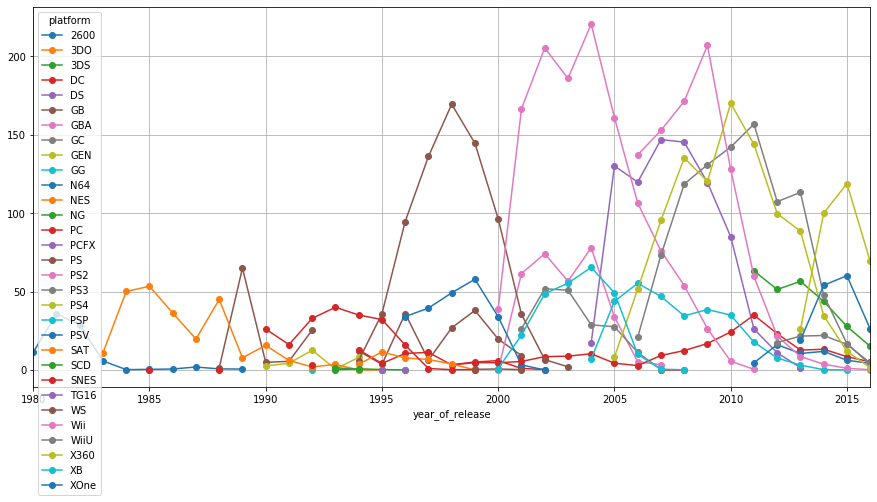

In [13]:
#сводная таблица для построения графиков по всем платфорам; по ней определим актуальынй период и ответим на опрос о цикле жизни платформ
games.pivot_table(index='year_of_release', columns ='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,7), style='o-', grid=True)

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Средняя продолжительность существования платформы указана ниже. Однако стоило привести ее в данном месте тоже. Еще лучше будет ее рассчитать.

</div>

#### Выводы по графику:
1. Основной массив и рост данных у нас сосредоточен от 2000 до 2016 года;
2. В среднем, если посмотреть, то платформа остается актуальной в течение пяти-шести лет, исключение составляет Playstation 2, которая, в силу своей популярности продержалась аж до 2011 года, хоть в 2006 и вышла Playstation 3;
3. PC держится дольше всех (аж с 1994 года), но это объяснимо тем, что это моноплатформа. Меняется лишь название операционной системы, внутренние и внешние комплектующие;
4. Основыми лидерами по графику являются платформы модели Playstation, во всех случаях они показывают высокие показатели (у PS2 вообще самые высокие продажи из всех);

##### За актуальный период примем промежуток с 2014 по 2016 год.

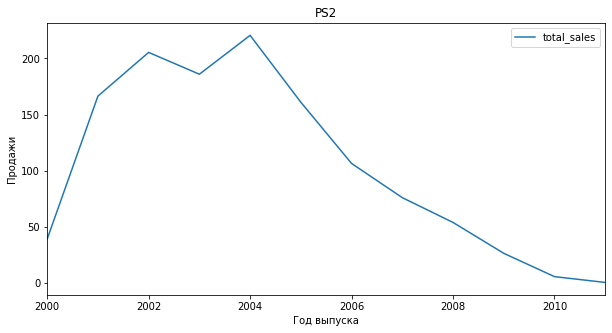

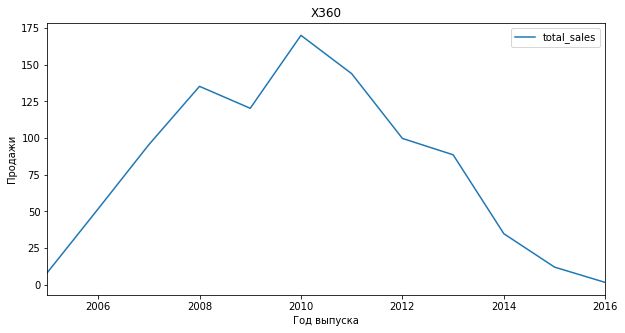

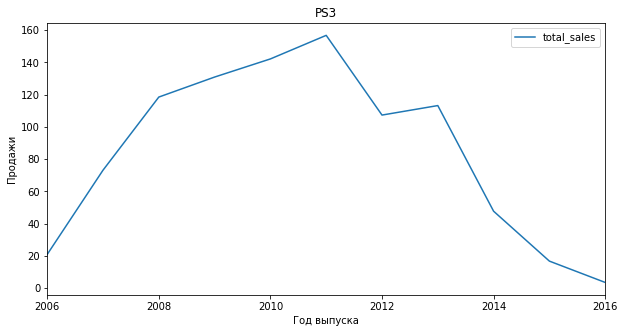

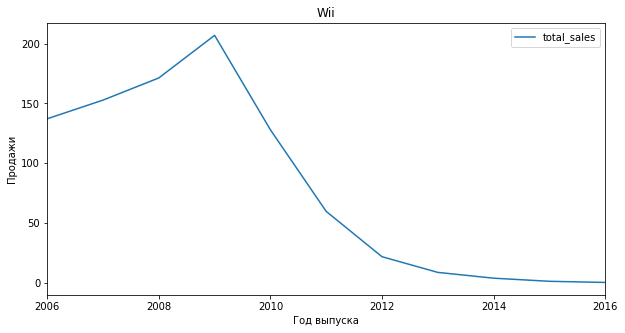

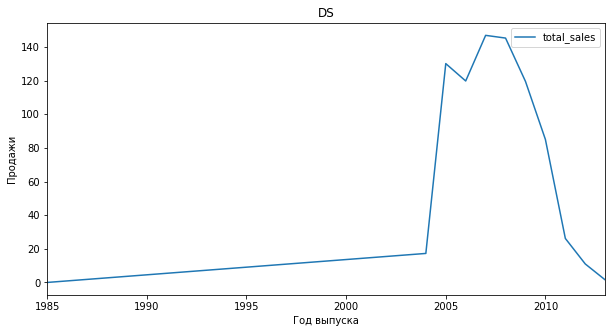

In [14]:
#определим топ5 платформ за все время
top_5_year = games.\
groupby(['platform'], as_index = False)['total_sales'].sum().sort_values('total_sales', ascending = False).head(5)['platform'].tolist()
for name in top_5_year:
    games.query('platform == @name').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',ascending = False).\
    plot(figsize = (10, 5), title = name)
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи')
    plt.legend()
    plt.show()

##### Вывод

##### PS2:
Была выпущена в 2000 году и с тех стермительно набирала популярность вплоть до пика в 2004 году, после этого начался спад, который закончился в 2011 году. Лидер по количеству выпущенных игр.

##### X360:
Выпущен в 2005году, пик популярности пришелся на 2010 год, затем спад, продолжающийся до 2016 года. Удивительно, но игр на него было выпущено больше, чем на PS3.

##### PS3:
Выпущена годом позже X360, пик популярности пришелся на 2011 год, затем спад с небольшим подъемом в 2013 году (возможно из-за того, что тогда были выпущены GTA V и Last of Us).

##### Wii:
Выпущена в 2006 году, пик пришелся на 2009 год, а затем спад и забытие. Оказалась крайне непопулярной и меньше всех продержалась из нашего топа.

##### DS
Запущена в 1985 году и продержалась дольше всех на рынке. С 1985 года наблюдается плавный прирост выпущенных игр, а в 2004 резкий скачок. Ситуация продолжалась до 2007 года, после чего (в связи с появлением PS3 и X360) популярность DS сошла на нет, но появиились ее осовременные реинкарнации.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Выбран правильный актуальный год. Так в рассмотрение попадут только последние поколения платформ. 

</div>

In [15]:
#делаем срез нашей таблицу по актуальному периоду
games = games.query('year_of_release >= 2012')
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-11,-11,-11,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-11,-11,-11,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,53,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,48,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-11,-11,-11,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,26,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,72,E,9.90


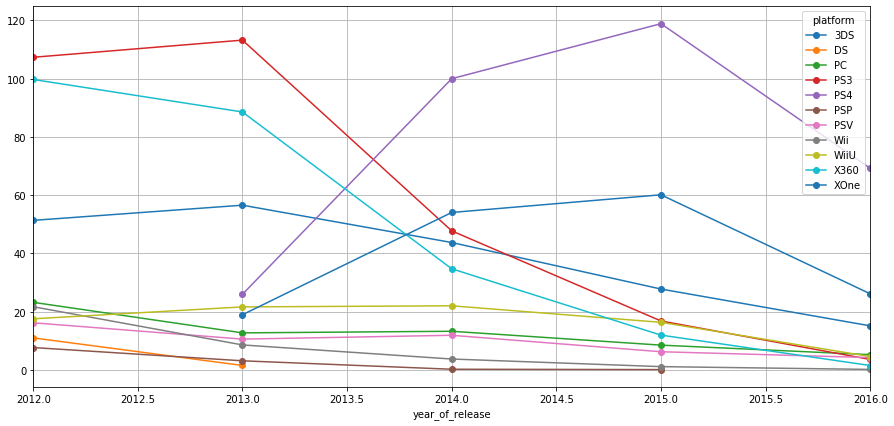

In [16]:
#сводная таблица, чтобы узнать данные по лидерству, ростам и спаду популярности платформ за актуальный период
games.pivot_table(index='year_of_release', columns ='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,7), style='o-', grid=True)

##### Выводы по графику:
1. PS4 находится в лидерах, пик ее пришелся на 2015 год, правда затем наблюдается спад, но это может быть обусловлено тем, что год выдался неудачным для игр;
2. XOne следом за PS4, но показатели у него значительно хуже, практически в два раза;
3. Предыдущее поколение консолей подходит к концу, что обусловлено их плавным спадом после выхода нового поколения PS и Xbox;
4. В целом можно заметить, что у всех платформ наблюдается спад к 2016 году, что может быть обусловлено тем, что большинство крутых игр и продуктов будет выпущено после этого года, или, как это всегда делается, ближе к окончанию цикла текущего поколения.

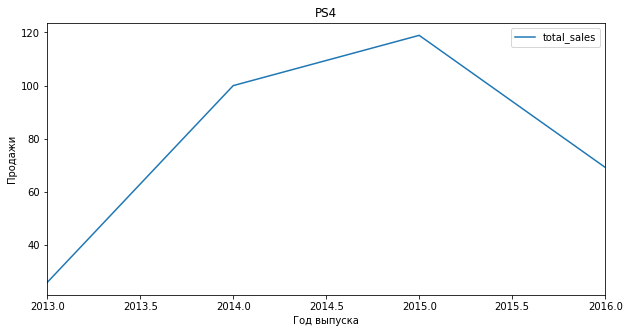

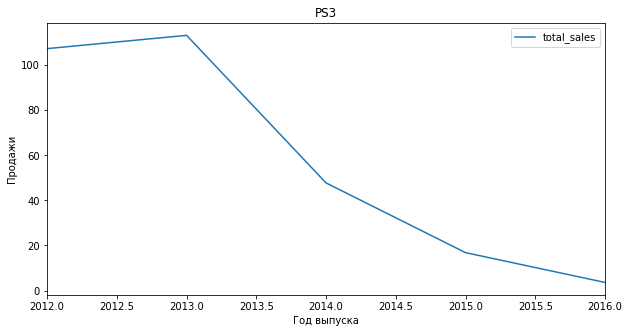

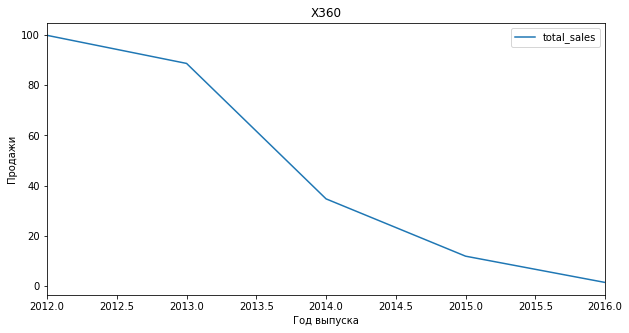

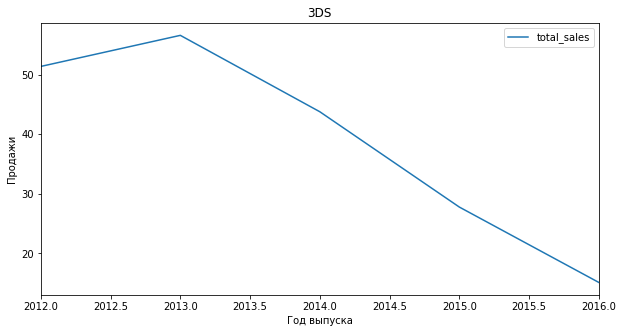

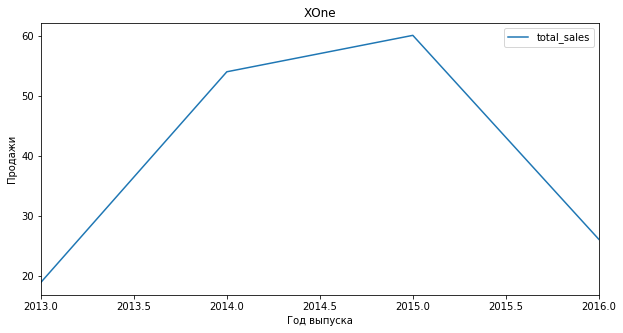

In [17]:
#определим топ5 платформ за актуальный период
top_5_year = games.\
groupby(['platform'], as_index = False)['total_sales'].sum().sort_values('total_sales', ascending = False).head(5)['platform'].tolist()
for name in top_5_year:
    games.query('platform == @name').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',ascending = False).\
    plot(figsize = (10, 5), title = name)
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи')
    plt.legend()
    plt.show()

##### Вывод:
Потенциально прибыльными платформами из списка можно определить PS4 и XOne. Это консоли нового поколения и игры на них только будет продолжать выпускать, чего нельзя сказать о PS3 и X360. PS3 и X360 консоли старого поколения, а 3DS не особо пользуется популярностью ввиду своего узконаправленного сегмента игр.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Да, именно эти платформы мы и можем назвать перспективными на 2017 год. 

</div>

(0, 2)

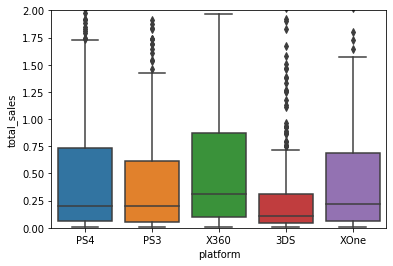

In [18]:
#построим боксплоты для топ5 платформ по продажам за актуальный период

#строю с помощью seaborn, x=наименование платформы, y=продажи, строю в порядке убывания, ylim(0,2)
ax = sns.boxplot(x="platform", y="total_sales", data=games,
                 order=["PS4", "PS3", "X360", "3DS", "XOne"])
ax.set_ylim([0, 2])

##### Вывод по графику:
1. Медианное значение у PS3, PS4 и XOne расположены практически одинаково, что говорит о том, что средние продажи игр на этих платформах схожи между собой.
2. Меньше всех медианное значение у 3DS, а максимальное у X360. В первое случае это говорит о том, что средние продажи 3DS ниже, чем у всех остальных, а во втором случае о том, что средние продажи игр на X360 выше, чем у всех остальных платформ;
3. Самый продолжительный интерквартильный размах у X360, более того, Q1 и Q3 у него тоже расположены на более выгодных позициях. Из этого мы можем заключить, что даже самые низкие продажи у него выше, чем у остальных;
4. Также 360 отличается отсуствие выбросов, что свидетельствует о более плавном распеределении продаж и общем успехе;
5. За исключением X360 лидером по продажам остаются PS4 и X0ne.

,total_sales,critic_score,user_score
total_sales,1.000000,0.349413,-0.012637
critic_score,0.349413,1.000000,0.304823
user_score,-0.012637,0.304823,1.000000


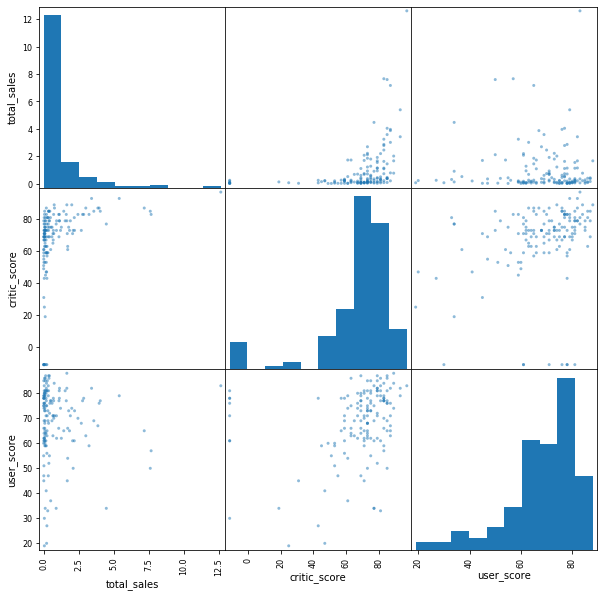

In [19]:
#диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе PS4
ps4_corr = games.query('(platform == "PS4") & (critic_score & user_score != -11)')[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(ps4_corr, figsize=(10, 10))
ps4_corr.corr()

##### Вывод:
1.Корреляция между продажами и отзывами критиков выражена слабо, но стремится к 0.5 (0.34);
2.Корреляция между продажами и отзывами критиков выражено слабо отрицательно (-0.12);
Полученные результаты говорят о том, что чем выше отзывы критиков, тем выше будут продажи у игры и, соответственно, чем ниже у игры оценка пользователей, тем ниже у ее буду продажи. Здесь мы так же видим, что оценка критиков оказывает большее влияние, чем оценка обычных пользователей.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Результат верный. Подумай, чем он вызван. Верно, что маркерные значения не включаются в анализ. 

</div>

,total_sales,critic_score,user_score
total_sales,1.000000,0.184428,-0.023546
critic_score,0.184428,1.000000,0.328009
user_score,-0.023546,0.328009,1.000000


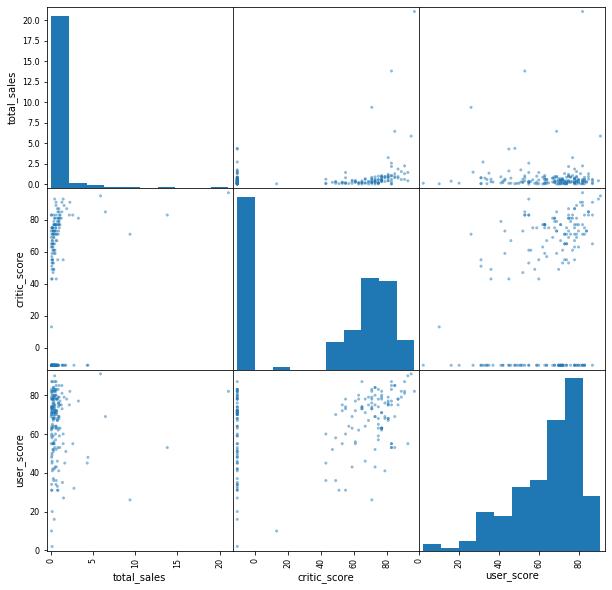

In [20]:
#диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе PS3
ps3_corr = games.query('(platform == "PS3") & (critic_score & user_score != -11)')[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(ps3_corr, figsize=(10, 10))
ps3_corr.corr()

##### Вывод:
1. Корреляция между отзывами критиков и продажами выражена слабо (0.18);
2. Корреляция между отзывами пользоватей и продажами выражена слабо отрицательно (-0.02) и практически стремится к нулю.

Такие выводы говорят о том, что оценки критиков на платформе PS3 играют большую роль в итогах продаж, чем оценки пользователей.

,total_sales,critic_score,user_score
total_sales,1.000000,0.278922,-0.003952
critic_score,0.278922,1.000000,0.330020
user_score,-0.003952,0.330020,1.000000


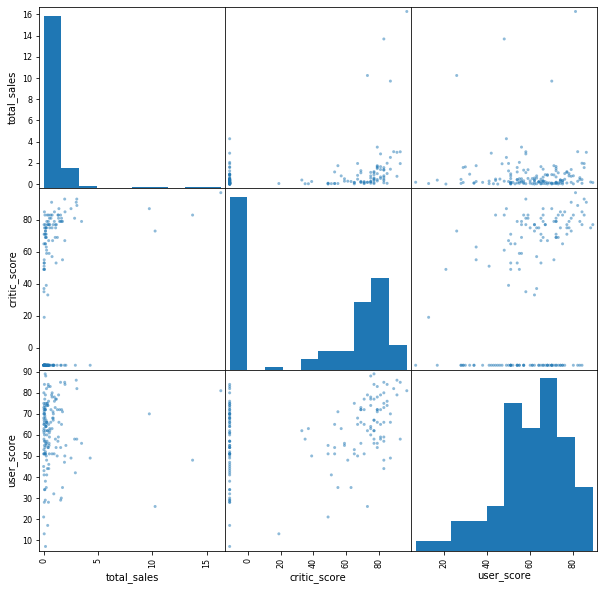

In [21]:
#диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе X360
x360_corr = games.query('(platform == "X360") & (critic_score & user_score != -11)')[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(x360_corr, figsize=(10, 10))
x360_corr.corr()

##### Вывод:
1. Корреляция между отзывами критиков и продажами выражена слабо (0.27);
2. Корреляция между отзывами пользоватей и продажами выражена отрицательно и сильно стермится к нулю.
По таким данным можно предположить лишь то, что оценки критиков влияют на продажи игр, а вот оценки пользователей не влияют ни на что.

,total_sales,critic_score,user_score
total_sales,1.000000,0.329669,0.201455
critic_score,0.329669,1.000000,0.486650
user_score,0.201455,0.486650,1.000000


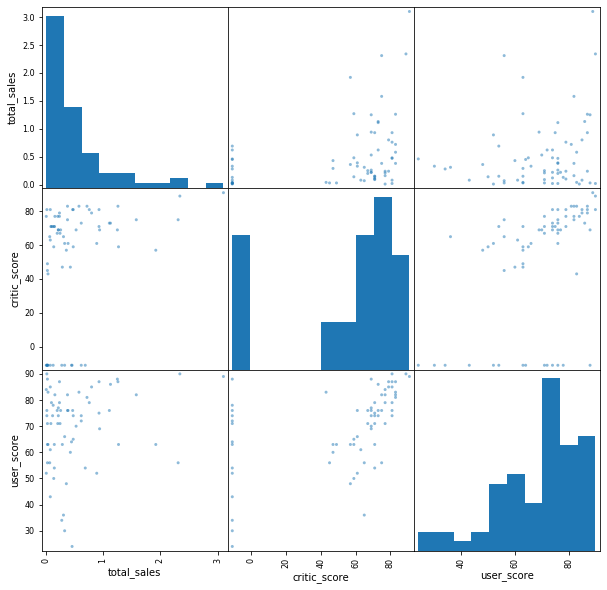

In [22]:
#диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе 3DS
ds_corr = games.query('(platform == "3DS") & (critic_score & user_score != -11)')[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(ds_corr, figsize=(10, 10))
ds_corr.corr()

##### Вывод:
1. Корреляция между отзывами критиков и продажами выражена слабо положительно (0.32);
2. Корреляция между отзывами пользоватей и продажами выражена слабо положительно (0.20).

Полученные данные говорят о том, что продажи практически одинаково зависят как от отзывов критиков, так и от отзывов пользователей.
Также это первый случай, когда корреляция между оценками пользователей и продажами выражена положительно.

,total_sales,critic_score,user_score
total_sales,1.000000,0.288143,0.051764
critic_score,0.288143,1.000000,0.256671
user_score,0.051764,0.256671,1.000000


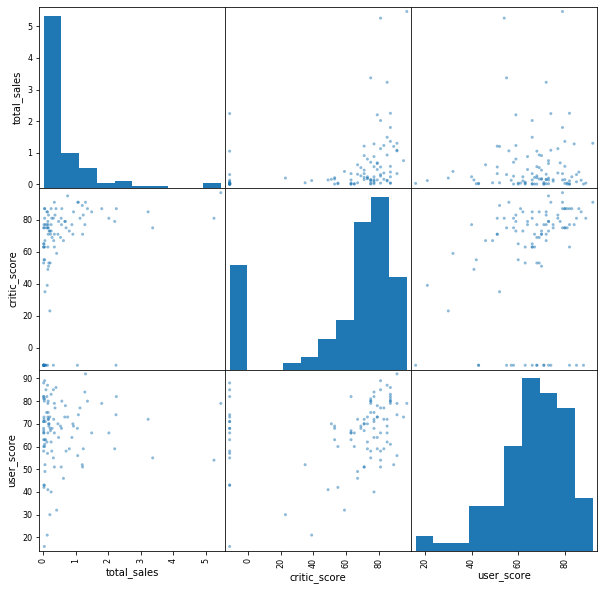

In [23]:
#диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе XOne
xone_corr = games.query('(platform == "XOne") & (critic_score & user_score != -11)')[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(xone_corr, figsize=(10, 10))
xone_corr.corr()

##### Вывод:
1. Корреляция между отзывами критиков и продажами выражена слабо (0.28);
2. Корреляция между отзывами пользоватей и продажами выражена слабо (0.05).
Можно сказать, что оценки критиков влияют на продажи игр на платформе XOne, а вот оценки пользователей нет.

##### Вывод:
1. Сильнее всех корреляция между отзывами критиков и проджами выражена на платформе PS4, а слабее всех на платформе PS3;
2. Сильнее всех корреляция между отзывами пользователей и продажами выражена на платформе 3DS, а слабее всех на платформе X360;
3. В целом, на успех продаж оценки профессиональных критиков оказывают большее влияние, чем оценки обычных пользователей.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Здорово, что рассмотрены несколько платформ. 

</div>

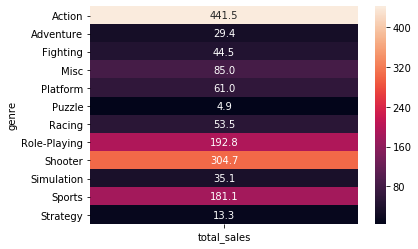

In [24]:
#посмотрим распределение игр по жанрам
#создаю сводную таблицу с данными о сумарнных продажах для каждого жанра.
platform_genre_sales = games.pivot_table(index='genre', values='total_sales', aggfunc = sum).fillna(0) #пропущенные значения заменим нулем
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f") #включаю отображение данных на самих полосках платформы и оставляю один знак после запятой

##### Вывод:
1. Самым прибыльным жанром является Action, а самым неприбыльным Puzzle;
2. Также хорошие показатели у жанров Shooter, RPG и Sports;
3. В середине расположились жанры Adventure, Fighting, Racing, Platform, Simulation, Misc;
В целом можно сказать, наиболее быстрые и активные, захватывающие жанры, лидириют по проджам, в то время, как такие неспешные жанры, как Puzzle. Strategy и Adventure показывают плохие показатели. Вполне вероятно, что они менее востребованы на рынке и аудитория у них небольшая. К тому же не все они, скорее всего, имеют мультиплеерный режим, что тоже сказывается на продажах, потому что, если у игры нет мультиплеера, то можно и с торрента скачать ее.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Правильно, но не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

### Вывод:

##### Что было сделано:
1. Посчитано и определено, сколько игр выпускалось в различные годы;
2. Были определены платформы с наибольшими суммарными продажами и построены графики распределения по годам для каждой из них;
3. Определен актуальный период данных для дальнешних вычислений;
4. На основании актуального периода был определен топ5 наиболее прибыльных платформ;
5. Построены боксплоты продаж каждой игры с разбикой по платформам;
6. Для наиболее популярной платформы была построена диаграмма рассеяния и матрица корреляции. То же самое было сделано для остальных четырех платформ;
7. Построеная тепловая карта распределения игровых жанров по суммарным продажам.

##### Анализ данных по общими данным: топ5 платформ - PS2, X360, PS3, Wii, DS
1. Больше всего игр было выпущено в 2008 и 2009 году, а меньше всего в 1980 году.
2. Основной объем данных по суммарным продажам сосредоточен в диапазоне от 2000 до 2016 года. Основными лидерами по продажам яявляются платформы марки Playstation, а средний жизненный цикл платформы составляет пять-шесть леть. Дольше всех продержалась PS2 (возможно, самая успешная консоль в истории) и PC;
3. Актуальный период был определен как 2012 - 2016 год;

##### Анализ данных по актуальному периоду: топ5 платформ - PS4, PS3, X360, 3DS, XOne
1. По продажам лидером являются PS4 и XOne (если учитывать только новое поколение консолей). Предыдущее поколение консолей показывают еще хорошие продажи, но идут на спад. В целом, у всех платформ наьлюдается спад продаж к 2016 году; это можно объяснить отсутствием хороших игр на рынке;
2. По построенным боксплотам можно вывести следующее: медиана у PS3, PS4 и XOne арсположены практически одинаково, что может говорить то том, что средние продажи на этих платформах схожи между собой. Наиболее плавное распределение у X360, что говорит об общей успешности всех выпущенныхигр на эту платформу. Из некстген консолей лидерами являются PS4 и XOne;
3. Полученные данные о корреляции между отзвами и продажами на PS4 (0.34) и (-0.12) говорят о том, что оценки профессиональных критиков имеют большее влияние на коммерческий успех игры, чем отзывы обычных пользователей. В сравнении с данными для остальных плафторм данные похожие, т.к как на остальных платформах прослеживается схожая тенденция. Таким образом мы заключаем, что оценки критиков в приоритете.
4. Самым прибыльным жанром оказался Action, а неприбыльным Puzzle. Также хорошие показатели у жанров Shooter, RPG и Sports. Можно проследить тенденцию, что, как правильно наиболее быстрее и активные жанры обладают большими продажами, в то время, как неторопливые, медленные жанры, например, Puzzle, не могут похвастаться хорошими результатами. Жаль, что нет данных у наличии мультиплеера в игре, это помогло бы сделать дополнительные выводы, например, о том, что у игр с хорошим мультиплеером более высокие продажи, чем у однопользовательских игр.


### Шаг 4. Портрет пользователя для каждого региона

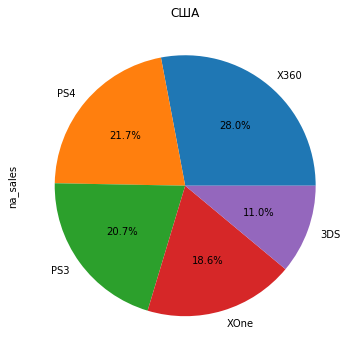

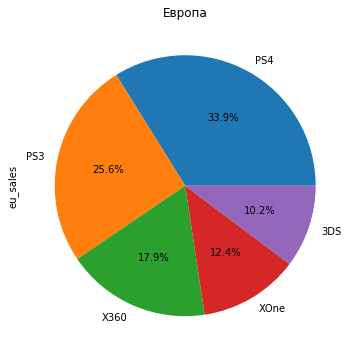

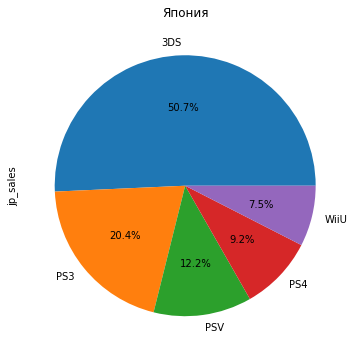

In [25]:
#топ5 платформ для каждого региона
#США
games.groupby(['platform']).agg({'na_sales':'sum'}).sort_values('na_sales', ascending = False).head().\
plot(y = 'na_sales', kind = 'pie', title = 'США', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))

#Европа
games.groupby(['platform']).agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending = False).head().\
plot(y = 'eu_sales', kind = 'pie', title = 'Европа', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))

#Япония
games.groupby(['platform']).agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending = False).head().\
plot(y = 'jp_sales', kind = 'pie', title = 'Япония', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))

##### Вывод

##### США:
1. Самая популярная платформа - X360 - 28%;
2. Самая непопулярная платформа - 3DS - 11&;
3. Практически равная доля у PS4 - 21.7% и PS3 - 20.7%.

Самые популярные платформы в США марки Xbox - суммарная их доля составляет 46.6% против 42.4% у Playstation.

##### Европа:
1. Самая популярная платформа - PS4 - 33.9%;
2. Самая непопулярная платформа - 3DS - 10.2%;

Самые популярные платформы в Европе марки Playstation - их суммарная доля составляет 59.5% против 30.3% у Xbox.

##### Япония:
1. Самая популярная платформа - 3DS - 50.7%;
2. Самая непопулярная платформа - WiiU - 7.5%;

Неожиданные результаты... Платформа 3DS занимают больше половины рынка продаж в Японии, обогнав PS обеих поколений, WiiU и PSV. Что примечательно, то в Японии совсем не популярен Xbox.

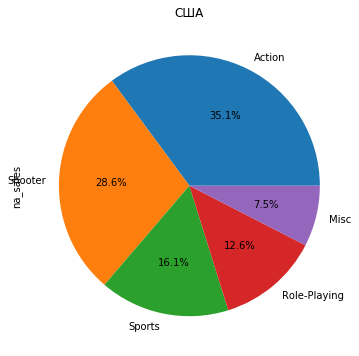

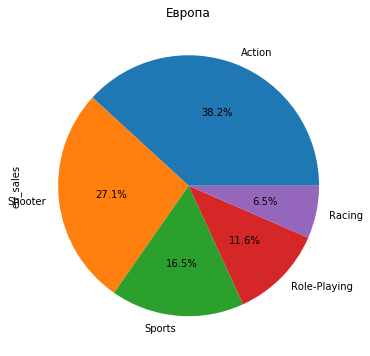

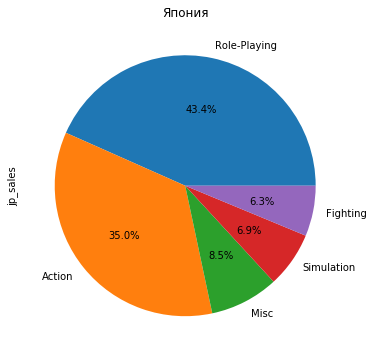

In [26]:
#топ5 жанров для каждого региона

#США
games.groupby(['genre']).agg({'na_sales':'sum'}).sort_values('na_sales', ascending = False).head().\
plot(y = 'na_sales', kind = 'pie', title = 'США', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))

#Европа
games.groupby(['genre']).agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending = False).head().\
plot(y = 'eu_sales', kind = 'pie', title = 'Европа', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))

#Япония
games.groupby(['genre']).agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending = False).head().\
plot(y = 'jp_sales', kind = 'pie', title = 'Япония', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))

##### Вывод

##### США:
1. Самые популярные жанры - Action и Shooter - 35.1% и 28.6%;
2. Самый непопулярный жаер - Misc - 7.5;

Такие цифры могут говорить о том, что в США популярные более активные, напряженные и быстрее игры, нежели медленные RPG.

##### Европа:
1. Самые популярыне жанры - Actions и Shooter - 38.2% и 27.1%;
2. Самый непопулярные жанр - Racing;

Европа в отношении популярных жанров схожа с США, а вот наименее популярным нажром оказался Racing. Доли жанра Sports почти схожи с долей того же жанра в США.

###### Япония:
1. Самые популярные жанры - RPG и Action - 43.4% и 35.0%;
2. Самые непопулярные жанры - Fighting, Simulation и Misc - 6.3%, 6.9% и 8.5%.

В Японии доли жанра Action сходжи с долями этого жанра в Европе и США, но самым популярным жанром является RPG, что разительно отличается от показателей других регионов.

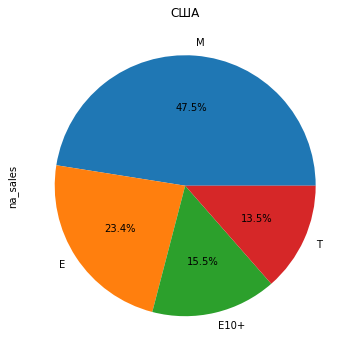

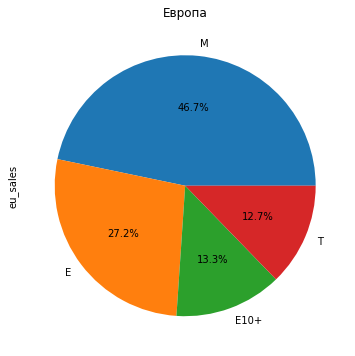

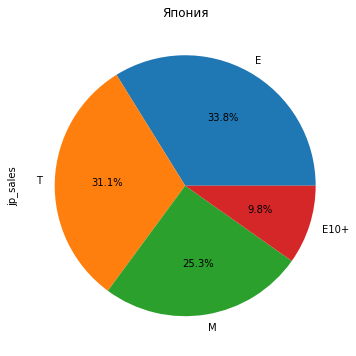

In [27]:
#влияние рейтинга на продажи
games.groupby(['rating']).agg({'na_sales':'sum'}).sort_values('na_sales', ascending = False).query('rating != -11').head().\
plot(y = 'na_sales', kind = 'pie', title = 'США', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))

#Европа
games.groupby(['rating']).agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending = False).query('rating != -11').head().\
plot(y = 'eu_sales', kind = 'pie', title = 'Европа', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))

#Япония
games.groupby(['rating']).agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending = False).query('rating != -11').head().\
plot(y = 'jp_sales', kind = 'pie', title = 'Япония', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))

##### Вывод

##### США:
1. Наиболее популярны игры с рейтингом - M - 47.5%;
2. Наименее популярны игры с рейтингами - T и E10+ - 13.5% и 15.5%;
3. Игры с рейтингом E занимают среднее и уверенное положение на рынке - 23.4%.

Доля игр с рейтингом M занимает почти головину об общей прибыли продаж, а вот игры с низкими возрастными рейтингами существенно проигрывают (даже, если доли сложить). Это может говорить о том, что рынок игр в США, в основном, ориентирован на пользователей от 17 лет и взрослое поколение, хотя нельзя исключать, что в эти игры также могут играть более младшие пользователи. Игры с рейтингом Е (для всех) занимают среднее и уверенное положение на рынке, обогнав "игры для подростков от 13 до 19 лет" и категорию игр "для всех". 

###### Европа:
1. Наиболее популярны игры с рейтингом - M - 46.7%;
2. Наименее популярны игры с рейтингами - T и E10+ - 12.7% и 13.3%.
3. Игры с рейтингом E занимают среднее и уверенное положение на рынке, чуть больше, чем в США - 27.2%.

Данные по Европе практически идентичны данным по США, с единственным отличием в том, что игры категории "для всех" занимают чуть большую долю продаж на рынке.

###### Япония:
1. Наиболее популярны игры с рейтингом - T, Е и M - 33.8%, 31.1% и 25.3%;
2. Наимененее популярны игры с рейтингом E10+ - 9.8%

В Японии возрастные рейтинги распределены равномернее, чем в Европе и США; нет такого сильного разрыва между долями.


##### Вывод

##### По данным платформ, жанров и возрастных рейтингов были построены круговые диаграммы и проанализированы полученные данные.

##### Портрет пользователя США:
1. Преподчитаемая платформа: консоль марки XBOX;
2. Предпочитаемые жанры: Action и Shooter;
3. Предпочитаемый возврастной рейтинг: M.

##### Портрет пользователя Европа:
1. Предпочитаемая платформа: консоли марки Playstation;
2. Преподчитаемые жанры: Action и Shooter;
3. Предпочитаемый возрастной рейтинг: M.

##### Портрет пользователя Япония:
1. Предпочитаемая платформа: 3DS;
2. Предпочитаемые жанры: RPG и Action;
3. Преподчитаемый возврастной рейтинг: E и T.

В целом, портреты пользоватей в США и в Европе практически идентичны. Одинаковы предпочитаемые жанры и возрастной рейтинг игр. Разница лишь в наиболее популярной марке консолей. 

Однако совершенно иные показатели у Японии. 3DS - наиболее популярная платформа, хотя и в США и в Европе она была наименее популярной. Наиболее популярный жанр тоже отличается. В Японии это RPG, а остальных регионах он не был настолько востребован. И, наконец, возрастной рейтинг. Если в США и в Европе наиболее популярны игры для людей от 17 лет и выше, то в Японии наиболее популярны игры с возврастным рейтингом E и T - "для всех" и "для подростков от 13 до 19 лет".

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Портрет типичного пользователя каждого из регионов получен. Приведены все необходимые графики. Здорово, что отмечены индивидуальные особенности каждого региона. 

</div>

### Шаг 5. Проверка гипотез

In [28]:
#проверка гипотезы - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

#h0 - Средние пользовательские рейтинги платформ Xbox One и PC не различаются;
#h1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются;

#создаю отдельные датафреймы с данными о пользовательском рейтинге для XOne и PC
user_score_xone = games.query('(platform == "XOne") & (user_score != -11)')['user_score']
user_score_pc = games.query('(platform == "PC") & (user_score != -11)')['user_score']
alpha = .05  #критический уровень статистической значимости 

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5926118514134907
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Гипотезы сформулированы и проверены верно.

</div>

In [29]:
#проверка гипотезы - "Средние пользовательские рейтинги жанров Action и Sports разные"

#h0 - Средние пользовательские рейтинги жанров Action и Sports не различаются;
#h1 - Средние пользовательские рейтинги жанров Action и Sports различаются.

#создаю отдельные датафреймы с данными о пользовательском рейтинге для Action и Sports
user_score_xone = games.query('(genre == "Action") & (user_score != -11)')['user_score']
user_score_pc = games.query('(genre == "Sports") & (user_score != -11)')['user_score']

alpha = .05  #критический уровень статистической значимости 

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.551295319559284e-20
Отвергаем нулевую гипотезу


##### Вывод

##### Для проверки гипотез было сделано следующее:
1. Созданы датафреймы с информацией о пользовательских рейтингах для платформ XOne и PC, и с информацией о пользовательских рейтингах жанров Actions и Sports;
2. Сформулированы нулевая и альтернативная гипотезы. Формулирование гипотез было произведено исходя из метода построения гипотезы о равенстве средних двух генеральных совокупностей;
3. Для проверки гипотезы были использованы Распределение Стьюдента и метод st.ttest_ind(array_1, array_2, equal_var). Параметрами были переданы созданные датафреймы и значение 'False';
4. Установлен критический уровень статистической значимости alpha = .05;
5. Произведены вычисления и проанализированы результаты.

##### Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" была подтвеждена.

##### Гипотеза "Средние пользовательские рейтинги жанров Action и Sports  разные" была подтверждена.

Исходя из полученных результатов мы видим, что:
средние пользовательские рейтинг для платформ Xbox One и PC одинаковы, что может быть связано как с успешностью портирования игр, так и с тем, что разработкой игры для PC и Xbox занимались одни и те же люди;

средние пользовательские рейтинги жанров Action и Sports различаются, что говорит нам о разных предпочтения пользователей и популярности жанра Sports как такового. 

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Также все хорошо. 
    
</div>

### Шаг 6. Общий вывод

##### Задачей проекта было выявить определяющие успешность игры закономерности.

##### В процессе работы было сделано следующее:
импортированы необходимые методы для построения графиков, вычисления статистики и работы с данными; получено общее представление о данных;  определено и подсчитано количество уникальных и пропущенных значений; изменены типы данных в столбцах; произведен анализ дубликатов; посчитаны суммарные продажи во всех регионах; получены данные о количество выпущенных игр в разные годы; определены платформы с наибольшими суммарными продажами и построены распределения по годам; определен актуальный период; были выбраны потенциально прибыльные платформы; построены боксплоты с разбивкой по продажам и платформам; проанализировано, как влияют на продажи игры отзывы критиков и пользователей; определены наиболее популярные жанры за все время; составлены портреты пользователей для каждого региона; сформулированы и проверены гипотезы; написаны выводы к каждому шагу работу и общий вывод; дан ответ на главный вопрос задачи.

##### Самые популярные платформы за все время - PS2, X360, PS3, Wii, DS.

##### Больше всего игры было выпущено в 2008 и в 2009 году; меньше всего в 1980 году.

##### Средний жизненный цикл игровой платформы составляет 5-6 лет, после чего ее популярность идет на спад, за исключением PS2, которая, как было не раз признано, остается самой популярной платформой в истории.

##### Актульный период для ответа на главный вопрос проекта - с 2012 по 2016 год.

##### Самые популярные платформы в актуальном периоде - PS4, PS3, X360, 3DS и XOne. 

##### Потенциально-прибыльные платформы: PS4 и XOne.

##### Самые прибыльные жанры - Action, Shooter, RPG; неприбыльные - Puzzle и Misc.

##### Корреляция между отзывами критиков и пользователей для платформы PS4 - 0.34 и -0.12.

### Портерты пользователей для каждого региона:

##### США - преподчитаемая платформа: консоль марки XBOX; предпочитаемые жанры: Action и Shooter; предпочитаемый возврастной рейтинг: M.

##### Европа - предпочитаемая платформа: консоли марки Playstation; преподчитаемые жанры: Action и Shooter; предпочитаемый возрастной рейтинг: M.

##### Япония - предпочитаемая платформа: 3DS; предпочитаемые жанры: RPG и Action; преподчитаемый возврастной рейтинг: E и T.

### В процессе работы необходимо было проверить две гипотезы: 

##### 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
##### 2. Средние пользовательские рейтинги жанров Action и Sports разные.

##### Для проверки первой гипотезы было сделано:
1. Созданы датафреймы с информацией о пользовательских рейтингах для платформ Xbox One и PC;
2. Сформулированы нулевая и альтернативная гипотезы: h0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые; h1 - средние пользовательские рейтинги платформ Xbox One и PC различаются;
3. Задан критический уровень статистичсекой значимости - alpha = .05;
4. Получено pvalue со значением - 0.5926118514134907

##### Нулевая гипотеза была подтверждена, что говорит о том, что средние пользовательские рейтинги для Xbox One и PC одинаковы.

##### Для проверки второй гипотезы было сделано:
1. Созданы датафреймы с информацией о пользовательских рейтингах для жанров Action и Sports;
2. Сформулированы нулевая и альтернативные гипотезы: h0 - cредние пользовательские рейтинги жанров Action и Sports одинаковые; h1 - средние пользовательские рейтинги жанров Action и Sports разные;
3. Задан критический уровень статистической значимости - alpha = .05;
4. Получено pvalue со значением - 3.551295319559284e-20

##### Нулевая гипотеза была отвергнуа, что говорит о том, что средние пользовательские рейтинги для жанров Action и Sports различаются.

### Подводя итог проделанной работе можно сделать обобщающие выводы:

##### 1. Самые популярные платформы за все время PS2 И XBOX 360; за актульный период - PS4 и XBOX ONE;

##### 2. Самые прибыльные жанры Action, Shooter и RPG;

##### 3. Оценки профессиональных критиков играют большую роль, чем отзывы простых пользователей;

##### 4. Портеры пользователей в США и Европе отличаются только по популярности игровой платформы, в остальном они идентичны; 

##### 5. Наиболее популярный возврастной рейтинг в США и в Европе - M, а в Японии E и T;

##### 6. Средние пользовательские рейтинги для XBOX и PC не отличаются; 

##### 7. Средние пользовательские рейтинги для жанров Action и Sports различаются.

##### Основными аспектами, влияющими на успешность игры являются: отзывы профессиональных критиков; платформа, на которой она выпущена (предпочтительнее PS4 и XBOX One); жанр игры (предпочтительные жанры Action, Shooter); возврастной рейтинг (для США и Европе предпочтительнее M, для Японии - E или T).

#### По итогу работы были проведены все необходимые вычисления и выполнены поставленные задания.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод.     

</div>

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Если тебе нравится тема визуализации, то можешь изучить другие методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Работа выполнена хорошо. Продолжай в том же духе :)

</div>
